In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('Insurance_Fraud.csv')
df.head(8)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN


Here we need to predict "fraud_reported". It is our target variable.

In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Lot of object columns are present, we need to convert them later into numerical data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:>

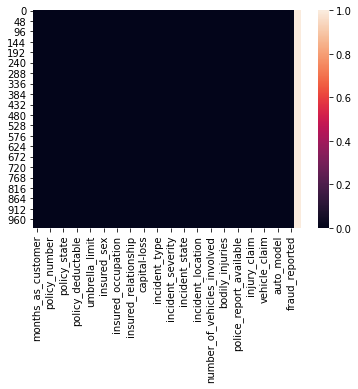

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
#we are removing column "_c39" as it has only null values

df = df.drop(['_c39'], axis = 1)

In [12]:
# We are also removing other columns which are of no use in detecting our target.
drop1= ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']
df = df.drop(drop1, axis = 1)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


"fraud_reported" is our target column and we will convert the variable under its column to 1 and 0.

In [13]:
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

In [14]:
df['fraud_reported'].unique()

array([1, 0])

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

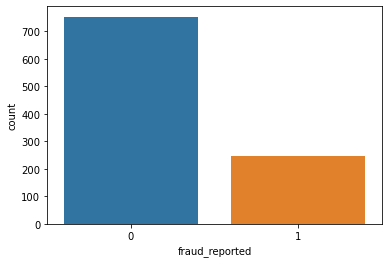

In [15]:
sns.countplot(df['fraud_reported'])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

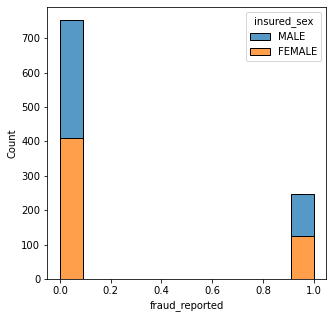

In [20]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="fraud_reported", hue='insured_sex',multiple="stack" )
plt.show()

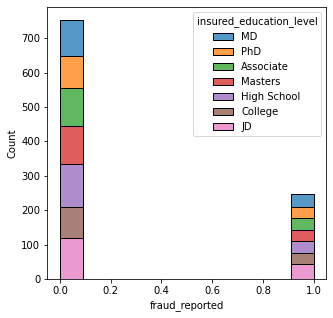

In [21]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="fraud_reported", hue='insured_education_level',multiple="stack" )
plt.show()

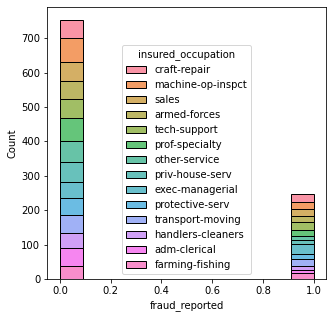

In [22]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="fraud_reported", hue='insured_occupation',multiple="stack" )
plt.show()

Below we can see that values of 1 is far more than 0 we will try to use SMOTE to balance the data.

In [23]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

There are lot of values with "?" in the data, we need to replace it with null values. Later we will convert the missing values using imputer technique.

In [25]:
df = df.replace('?',np.NaN)
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
police_report_available         True
total_claim_amount             False
injury_claim                   False
p

In [26]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['policy_bind_date', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')


In [27]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount              763
injury_claim                    638
property_claim              

Need to convert "policy_bind_date" column to datetime

In [30]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [31]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_type : 4
collision_type : 3
incident_severity : 4
authorities_contacted : 5
property_damage : 2
police_report_available : 2
auto_make : 14
auto_model : 39


In [ ]:
df['policy_bind_date']=df['policy_bind_date'].fillna(df['policy_bind_date'].mean())

People having hobby as cross-fit and chess have high no. of fraudulent claims. We will keep these two and rename the other items to "other".

In [32]:
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['insured_hobbies'].unique()

array(['other', 'chess', 'cross-fit'], dtype=object)

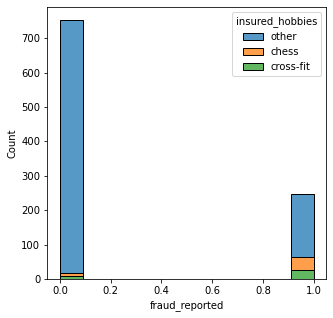

In [41]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,  x="fraud_reported", hue='insured_hobbies',multiple="stack" )
plt.show()

Now, we will make the groups of different columns as below:

In [33]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)

In [34]:
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)

In [36]:
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

As we have made the groups, then we will remove the unwanted columns.

In [37]:
df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
df.columns

Index(['policy_number', 'policy_bind_date', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'age ',
       'months_as_customer_groups', 'policy_annual_premium_groups',
       'policy_deductable_group'],
      dtype='object')

In [38]:
t = df['total_claim_amount'].iloc[1]
a = df['vehicle_claim'].iloc[1]
b = df['property_claim'].iloc[1]
c = df['injury_claim'].iloc[1]

print(t)
a+b+c

5070


5070

As we can see that total_claim_amount is equal to the sum of injury_claim', 'property_claim', 'vehicle_claim', so we can only keep the column Total claim and drop the other three.

In [42]:
df = df.drop(['injury_claim', 'property_claim', 'vehicle_claim'], axis = 1)
df.columns

Index(['policy_number', 'policy_bind_date', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported', 'age ',
       'months_as_customer_groups', 'policy_annual_premium_groups',
       'policy_deductable_group'],
      dtype='object')

In [43]:
df.head()

,policy_number,policy_bind_date,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,521585,2014-10-17,0,466132,MALE,MD,craft-repair,other,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,48,301-350,medium,501-1000
1,342868,2006-06-27,5000000,468176,MALE,MD,machine-op-inspct,other,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,5070,Mercedes,E400,2007,1,42,201-250,medium,1501-2000
2,687698,2000-06-09,5000000,430632,FEMALE,PhD,sales,other,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,Dodge,RAM,2007,0,29,101-150,medium,1501-2000
3,227811,1990-05-25,6000000,608117,FEMALE,PhD,armed-forces,other,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NaN,1,2,NO,63400,Chevrolet,Tahoe,2014,1,41,251-300,medium,1501-2000
4,367455,2014-06-06,6000000,610706,MALE,Associate,sales,other,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,20,1,NO,0,1,NO,6500,Accura,RSX,2009,0,44,201-250,high,501-1000


In [44]:
df.dtypes

policy_number                            int64
policy_bind_date                datetime64[ns]
umbrella_limit                           int64
insured_zip                              int64
insured_sex                             object
insured_education_level                 object
insured_occupation                      object
insured_hobbies                         object
insured_relationship                    object
capital-gains                            int64
capital-loss                             int64
incident_type                           object
collision_type                          object
incident_severity                       object
authorities_contacted                   object
incident_hour_of_the_day                 int64
number_of_vehicles_involved              int64
property_damage                         object
bodily_injuries                          int64
witnesses                                int64
police_report_available                 object
total_claim_a

Now, we will separate the date, month and column

In [45]:
df['Year'] = df['policy_bind_date'].dt.year
df['Month'] = df['policy_bind_date'].dt.month
df['Day'] = df['policy_bind_date'].dt.day

In [46]:
df.head()

,policy_number,policy_bind_date,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day
0,521585,2014-10-17,0,466132,MALE,MD,craft-repair,other,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,48,301-350,medium,501-1000,2014,10,17
1,342868,2006-06-27,5000000,468176,MALE,MD,machine-op-inspct,other,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,5070,Mercedes,E400,2007,1,42,201-250,medium,1501-2000,2006,6,27
2,687698,2000-06-09,5000000,430632,FEMALE,PhD,sales,other,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,Dodge,RAM,2007,0,29,101-150,medium,1501-2000,2000,6,9
3,227811,1990-05-25,6000000,608117,FEMALE,PhD,armed-forces,other,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NaN,1,2,NO,63400,Chevrolet,Tahoe,2014,1,41,251-300,medium,1501-2000,1990,5,25
4,367455,2014-06-06,6000000,610706,MALE,Associate,sales,other,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,20,1,NO,0,1,NO,6500,Accura,RSX,2009,0,44,201-250,high,501-1000,2014,6,6


In [47]:
df = df.drop(['policy_bind_date'], axis = 1)

In [ ]:
Now, we will use the imputer techniques to fill the missing values.

In [50]:
from sklearn.impute import SimpleImputer

In [ ]:
df['insured_sex']=df['insured_sex '].fillna(df['insured_sex'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [51]:
imp= SimpleImputer(strategy='most_frequent')
df['insured_sex']=imp.fit_transform(df['insured_sex'].values.reshape(-1, 1))
df.head(2)

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day
0,521585,0,466132,MALE,MD,craft-repair,other,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,48,301-350,medium,501-1000,2014,10,17
1,342868,5000000,468176,MALE,MD,machine-op-inspct,other,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,5070,Mercedes,E400,2007,1,42,201-250,medium,1501-2000,2006,6,27


In [52]:
imp= SimpleImputer(strategy='most_frequent')
df['property_damage']=imp.fit_transform(df['property_damage'].values.reshape(-1, 1))
df.head(2)

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day
0,521585,0,466132,MALE,MD,craft-repair,other,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,48,301-350,medium,501-1000,2014,10,17
1,342868,5000000,468176,MALE,MD,machine-op-inspct,other,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NO,0,0,NaN,5070,Mercedes,E400,2007,1,42,201-250,medium,1501-2000,2006,6,27


In [53]:
imp= SimpleImputer(strategy='most_frequent')
df['police_report_available']=imp.fit_transform(df['police_report_available'].values.reshape(-1, 1))
df.head(2)

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day
0,521585,0,466132,MALE,MD,craft-repair,other,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,Saab,92x,2004,1,48,301-350,medium,501-1000,2014,10,17
1,342868,5000000,468176,MALE,MD,machine-op-inspct,other,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NO,0,0,NO,5070,Mercedes,E400,2007,1,42,201-250,medium,1501-2000,2006,6,27


In [58]:
num_data = df.select_dtypes(include=['int'])
print(num_data.columns)

Index(['policy_number', 'umbrella_limit', 'insured_zip', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'auto_year', 'fraud_reported', 'age ', 'Year',
       'Month', 'Day'],
      dtype='object')


In [60]:
df['policy_number']=df['policy_number'].fillna(df['policy_number'].mean())
df['umbrella_limit']=df['umbrella_limit'].fillna(df['umbrella_limit'].mean())
df['insured_zip']=df['insured_zip'].fillna(df['insured_zip'].mean())
df['capital-gains']=df['capital-gains'].fillna(df['capital-gains'].mean())
df['capital-loss']=df['capital-loss'].fillna(df['capital-loss'].mean())

df['incident_hour_of_the_day']=df['incident_hour_of_the_day'].fillna(df['incident_hour_of_the_day'].mean())
df['number_of_vehicles_involved']=df['number_of_vehicles_involved'].fillna(df['number_of_vehicles_involved'].mean())
df['bodily_injuries']=df['bodily_injuries'].fillna(df['bodily_injuries'].mean())
df['witnesses']=df['witnesses'].fillna(df['witnesses'].mean())
df['total_claim_amount']=df['total_claim_amount'].fillna(df['total_claim_amount'].mean())

df['auto_year']=df['auto_year'].fillna(df['auto_year'].mean())

df['Year']=df['Year'].fillna(df['Year'].mean())
df['Month']=df['Month'].fillna(df['Month'].mean())
df['Day']=df['Day'].fillna(df['Day'].mean())

In [61]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')


In [62]:
df['insured_education_level']=df['insured_education_level'].fillna(df['insured_education_level'].mode()[0])
df['insured_education_level']=df['insured_education_level'].fillna(df['insured_education_level'].mode()[0])
df['insured_occupation'] = df['insured_occupation'].fillna(df['insured_occupation'].mode()[0])
df['insured_hobbies'] = df['insured_hobbies'].fillna(df['insured_hobbies'].mode()[0])
df['insured_relationship'] = df['insured_relationship'].fillna(df['insured_relationship'].mode()[0])

df['incident_type']=df['incident_type'].fillna(df['incident_type'].mode()[0])
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['incident_severity'] = df['incident_severity'].fillna(df['incident_severity'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])
df['auto_make'] = df['auto_make'].fillna(df['auto_make'].mode()[0])
df['auto_model'] = df['auto_model'].fillna(df['auto_model'].mode()[0])


In [63]:
df.isnull().sum()

policy_number                   0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted           0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
auto_make                       0
auto_model                      0
auto_year                       0
fraud_reported                  0
age                             0
months_as_customer_groups       0
policy_annual_premium_groups    0
policy_deductable_group         0
Year          

Now we will convert the object type values to numerical type using labelencoder.

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day
0,521585,0,466132,1,4,2,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,71610,10,1,2004,1,48,301-350,medium,501-1000,2014,10,17
1,342868,5000000,468176,1,4,6,2,2,0,0,3,1,1,4,8,1,0,0,0,0,5070,8,12,2007,1,42,201-250,medium,1501-2000,2006,6,27
2,687698,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,7,3,0,2,3,0,34650,4,30,2007,0,29,101-150,medium,1501-2000,2000,6,9
3,227811,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,63400,3,34,2014,1,41,251-300,medium,1501-2000,1990,5,25
4,367455,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,20,1,0,0,1,0,6500,0,31,2009,0,44,201-250,high,501-1000,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,0,431289,0,5,2,2,4,0,0,2,0,1,1,20,1,1,0,1,0,87200,6,6,2006,0,38,0-50,medium,501-1000,1991,7,16
996,186934,0,608177,0,6,9,2,5,70900,0,2,1,0,1,23,1,1,2,3,0,108480,13,28,2015,0,41,251-300,medium,501-1000,2014,5,1
997,918516,3000000,442797,0,5,1,2,2,35100,0,0,2,1,4,4,3,0,2,3,1,67500,11,19,1996,0,34,101-150,medium,0-500,2003,2,17
998,533940,5000000,441714,1,0,5,2,5,0,0,2,1,0,3,2,1,0,0,1,1,46980,1,5,1998,0,62,451-500,medium,1501-2000,2011,11,18


In [65]:
a=df.pop('fraud_reported')

In [66]:
df.insert(31, 'fraud_reported', a)

In [67]:
df.head(4)

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day,fraud_reported
0,521585,0,466132,1,4,2,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,71610,10,1,2004,48,301-350,medium,501-1000,2014,10,17,1
1,342868,5000000,468176,1,4,6,2,2,0,0,3,1,1,4,8,1,0,0,0,0,5070,8,12,2007,42,201-250,medium,1501-2000,2006,6,27,1
2,687698,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,7,3,0,2,3,0,34650,4,30,2007,29,101-150,medium,1501-2000,2000,6,9,0
3,227811,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,63400,3,34,2014,41,251-300,medium,1501-2000,1990,5,25,1


In [72]:
imp= SimpleImputer(strategy='most_frequent')
df['fraud_reported']=imp.fit_transform(df['fraud_reported'].values.reshape(-1, 1))
df.head(2)

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day,fraud_reported
0,521585,0,466132,1,4,2,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,71610,10,1,2004,48,301-350,medium,501-1000,2014,10,17,1
1,342868,5000000,468176,1,4,6,2,2,0,0,3,1,1,4,8,1,0,0,0,0,5070,8,12,2007,42,201-250,medium,1501-2000,2006,6,27,1


In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['months_as_customer_groups', 'policy_annual_premium_groups', 'policy_deductable_group']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day,fraud_reported
0,521585,0,466132,1,4,2,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,71610,10,1,2004,48,5,2,2,2014,10,17,1
1,342868,5000000,468176,1,4,6,2,2,0,0,3,1,1,4,8,1,0,0,0,0,5070,8,12,2007,42,3,2,1,2006,6,27,1
2,687698,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,7,3,0,2,3,0,34650,4,30,2007,29,1,2,1,2000,6,9,0
3,227811,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,63400,3,34,2014,41,4,2,1,1990,5,25,1
4,367455,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,20,1,0,0,1,0,6500,0,31,2009,44,3,0,2,2014,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,0,431289,0,5,2,2,4,0,0,2,0,1,1,20,1,1,0,1,0,87200,6,6,2006,38,0,2,2,1991,7,16,0
996,186934,0,608177,0,6,9,2,5,70900,0,2,1,0,1,23,1,1,2,3,0,108480,13,28,2015,41,4,2,2,2014,5,1,0
997,918516,3000000,442797,0,5,1,2,2,35100,0,0,2,1,4,4,3,0,2,3,1,67500,11,19,1996,34,1,2,0,2003,2,17,0
998,533940,5000000,441714,1,0,5,2,5,0,0,2,1,0,3,2,1,0,0,1,1,46980,1,5,1998,62,8,2,1,2011,11,18,0


In [81]:
x=df.iloc[:,0:-1]
x

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day
0,521585,0,466132,1,4,2,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,71610,10,1,2004,48,5,2,2,2014,10,17
1,342868,5000000,468176,1,4,6,2,2,0,0,3,1,1,4,8,1,0,0,0,0,5070,8,12,2007,42,3,2,1,2006,6,27
2,687698,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,7,3,0,2,3,0,34650,4,30,2007,29,1,2,1,2000,6,9
3,227811,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,63400,3,34,2014,41,4,2,1,1990,5,25
4,367455,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,20,1,0,0,1,0,6500,0,31,2009,44,3,0,2,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,941851,0,431289,0,5,2,2,4,0,0,2,0,1,1,20,1,1,0,1,0,87200,6,6,2006,38,0,2,2,1991,7,16
996,186934,0,608177,0,6,9,2,5,70900,0,2,1,0,1,23,1,1,2,3,0,108480,13,28,2015,41,4,2,2,2014,5,1
997,918516,3000000,442797,0,5,1,2,2,35100,0,0,2,1,4,4,3,0,2,3,1,67500,11,19,1996,34,1,2,0,2003,2,17
998,533940,5000000,441714,1,0,5,2,5,0,0,2,1,0,3,2,1,0,0,1,1,46980,1,5,1998,62,8,2,1,2011,11,18


In [82]:
y=df.iloc[:,-1]
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [86]:
y.value_counts()

0    753
1    753
Name: fraud_reported, dtype: int64

policy_number                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
umbrella_limit                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
insured_zip                     AxesSubplot(0.390714,0.772143;0.110714x0.107857)
insured_sex                     AxesSubplot(0.523571,0.772143;0.110714x0.107857)
insured_education_level         AxesSubplot(0.656429,0.772143;0.110714x0.107857)
insured_occupation              AxesSubplot(0.789286,0.772143;0.110714x0.107857)
insured_hobbies                    AxesSubplot(0.125,0.642714;0.110714x0.107857)
insured_relationship            AxesSubplot(0.257857,0.642714;0.110714x0.107857)
capital-gains                   AxesSubplot(0.390714,0.642714;0.110714x0.107857)
capital-loss                    AxesSubplot(0.523571,0.642714;0.110714x0.107857)
incident_type                   AxesSubplot(0.656429,0.642714;0.110714x0.107857)
collision_type                  AxesSubplot(0.789286,0.642714;0.110714x0.107857)
incident_severity           

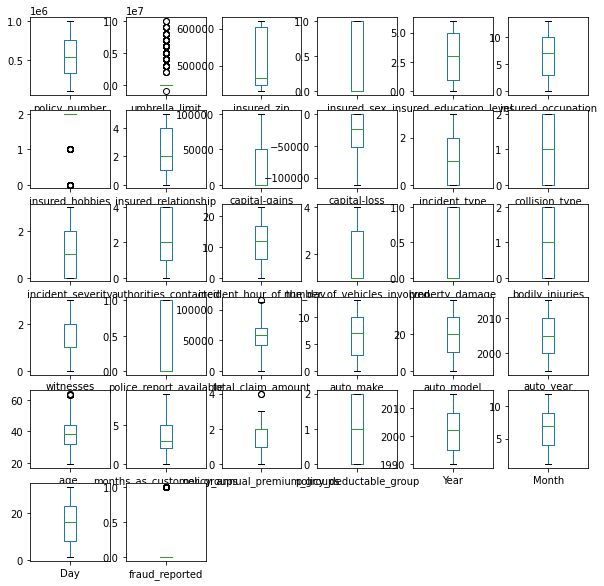

In [83]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

Removing Outliers using Zscore

In [87]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[0.09595307, 0.47947582, 0.48952934, ..., 1.01502574, 0.17545148,
        1.74601919],
       [0.79152739, 1.69798022, 0.46100805, ..., 0.16489375, 1.30593786,
        1.74601919],
       [0.55056594, 1.69798022, 0.98488451, ..., 0.16489375, 0.72893761,
        0.57273139],
       ...,
       [1.44891961, 0.8269978 , 0.81513815, ..., 1.34481324, 0.17545148,
        0.57273139],
       [0.04786687, 1.69798022, 0.83024997, ..., 1.31000562, 0.28850012,
        0.57273139],
       [0.03830297, 0.47947582, 1.54949205, ..., 1.31000562, 0.50284034,
        0.57273139]])

In [88]:
threshold=3
print(np.where(z>3))

(array([ 23,  27,  31,  41,  48,  56,  64,  65,  88, 109, 115, 119, 206,
       247, 248, 262, 314, 365, 374, 383, 420, 430, 437, 445, 458, 474,
       478, 503, 513, 552, 561, 574, 590, 597, 602, 612, 620, 629, 635,
       638, 649, 657, 665, 683, 700, 707, 709, 712, 763, 784, 803, 807,
       829, 845, 853, 868, 872, 875, 888, 915, 917, 919, 922, 975]), array([ 6,  6,  1,  6,  1,  6,  6,  6,  1,  6,  1,  1,  6,  6, 26,  1,  1,
        6,  6,  6,  6,  1,  6,  6,  1,  6,  6,  1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  1,  6,  6,  1,  6,  6,  6, 26,  6,  6,
        9,  6,  6,  6,  6,  6,  1,  6,  6,  6,  6,  1,  1]))


In [89]:
df_new=df[(z<3).all(axis=1)]

In [90]:
df_new.head()

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day,fraud_reported
0,521585,0,466132,1,4,2,2,0,53300,0,2,2,0,4,5,1,1,1,2,1,71610,10,1,2004,48,5,2,2,2014,10,17,1
1,342868,5000000,468176,1,4,6,2,2,0,0,3,1,1,4,8,1,0,0,0,0,5070,8,12,2007,42,3,2,1,2006,6,27,1
2,687698,5000000,430632,0,6,11,2,3,35100,0,0,1,1,4,7,3,0,2,3,0,34650,4,30,2007,29,1,2,1,2000,6,9,0
3,227811,6000000,608117,0,6,1,2,4,48900,-62400,2,0,0,4,5,1,0,1,2,0,63400,3,34,2014,41,4,2,1,1990,5,25,1
4,367455,6000000,610706,1,0,11,2,4,66000,-46000,3,1,1,2,20,1,0,0,1,0,6500,0,31,2009,44,3,0,2,2014,6,6,0


In [91]:
df_new.shape

(936, 32)

In [92]:
df=df_new

In [93]:
from sklearn.preprocessing import power_transform

In [94]:
x=power_transform(x,method='yeo-johnson')
x

array([[-4.52350266e-03, -3.79083585e-01, -6.10622664e-16, ...,
         1.62980740e-13,  1.10086265e+00,  2.28739344e-01],
       [-7.42373936e-01,  1.28092974e+00, -4.99600361e-16, ...,
         5.91193761e-14, -6.67723640e-02,  1.31857607e+00],
       [ 6.09298538e-01,  1.28092974e+00, -1.77635684e-15, ...,
        -1.98729921e-14, -6.67723640e-02, -7.45967729e-01],
       ...,
       [-1.10739300e+00, -3.79083585e-01, -4.44089210e-16, ...,
         5.91193761e-14,  5.32023050e-01,  7.86881864e-01],
       [-1.96866172e+00, -3.79083585e-01, -2.22044605e-16, ...,
        -3.31401573e-14,  1.37622614e+00, -2.42968370e-01],
       [ 1.18844081e+00, -3.79083585e-01, -8.88178420e-16, ...,
         7.22200078e-14,  2.36918977e-01,  8.95115768e-01]])

Scaling of the data

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.0045235 , -0.37908359, -0.42237326, ...,  1.79414663,
         1.10086265,  0.22873934],
       [-0.74237394,  1.28092974, -0.34326692, ...,  0.65053253,
        -0.06677236,  1.31857607],
       [ 0.60929854,  1.28092974, -1.25298991, ..., -0.21924987,
        -0.06677236, -0.74596773],
       ...,
       [-1.107393  , -0.37908359, -0.30371374, ...,  0.65053253,
         0.53202305,  0.78688186],
       [-1.96866172, -0.37908359, -0.14550105, ..., -0.36533419,
         1.37622614, -0.24296837],
       [ 1.18844081, -0.37908359, -0.62013913, ...,  0.79478316,
         0.23691898,  0.89511577]])

In [97]:
df.corr()

,policy_number,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,age,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group,Year,Month,Day,fraud_reported
policy_number,1.000000,0.008090,0.002278,0.015531,-0.040503,-0.010408,-0.031250,0.016701,0.019361,-0.009414,-0.000329,-0.008124,-0.005955,0.007498,0.002864,0.015218,-0.033927,-0.009536,-0.016669,0.018815,-0.018732,0.020479,0.071050,0.000620,0.065771,0.001409,-0.030032,-0.038285,-0.053317,0.012723,0.052167,-0.026024
umbrella_limit,0.008090,1.000000,-0.002626,0.006203,-0.033694,-0.004660,-0.016087,0.098275,-0.033231,-0.025429,0.041531,0.014925,-0.015751,0.012552,-0.038193,-0.046516,-0.071508,0.047109,0.006281,-0.032365,-0.041001,0.000473,0.030751,0.019679,0.007862,0.018589,0.047546,0.005706,0.053060,-0.003156,-0.035198,0.035215
insured_zip,0.002278,-0.002626,1.000000,-0.043812,0.013816,-0.071115,0.018882,0.002520,0.012824,0.055246,-0.000483,-0.016725,-0.015875,-0.020093,0.021544,0.020891,0.027944,0.028785,0.011044,0.016337,-0.025839,-0.035917,0.040628,-0.043764,0.035529,0.041812,0.010535,-0.037556,-0.003101,0.005140,-0.051008,0.006020
insured_sex,0.015531,0.006203,-0.043812,1.000000,0.010551,-0.014289,0.009588,0.003918,-0.023302,-0.020285,-0.006312,-0.017402,-0.025460,0.010413,0.011077,0.027677,0.036163,-0.022189,0.038018,0.026017,-0.020586,0.014932,-0.013738,-0.034405,0.078003,0.073492,-0.069100,-0.029616,-0.033167,-0.006619,0.043156,0.025542
insured_education_level,-0.040503,-0.033694,0.013816,0.010551,1.000000,-0.026948,0.060008,-0.029625,0.032380,0.033982,0.011247,-0.025709,-0.007394,-0.019923,-0.050232,-0.000919,-0.054302,-0.020701,0.018984,0.071253,0.095229,0.064968,0.047868,0.037621,0.003143,-0.037298,0.050295,-0.016659,0.021803,-0.008317,0.020389,0.004825
insured_occupation,-0.010408,-0.004660,-0.071115,-0.014289,-0.026948,1.000000,-0.031385,-0.008839,-0.009151,-0.014953,0.009713,0.001296,0.006085,-0.002660,-0.019238,-0.025229,-0.011353,-0.005399,-0.017100,-0.015092,-0.012589,0.040993,0.015150,-0.003611,0.020900,-0.005217,-0.025485,-0.061382,-0.024315,0.013485,-0.002545,-0.002641
insured_hobbies,-0.031250,-0.016087,0.018882,0.009588,0.060008,-0.031385,1.000000,0.006405,0.017577,-0.004227,-0.025471,-0.010837,-0.023206,0.031018,0.042917,0.001669,-0.019972,0.014230,-0.016478,0.021942,-0.059572,0.059775,0.001081,-0.000787,-0.019454,-0.001053,0.003741,-0.017075,0.025466,-0.028458,-0.014174,-0.245165
insured_relationship,0.016701,0.098275,0.002520,0.003918,-0.029625,-0.008839,0.006405,1.000000,-0.023315,-0.062522,0.034619,-0.008715,0.009923,-0.012819,0.002516,-0.049612,-0.043992,0.011407,0.012860,-0.023623,0.006935,-0.014712,0.059312,-0.025218,0.074386,0.037122,-0.032271,-0.021248,0.002887,0.046808,0.005607,0.013292
capital-gains,0.019361,-0.033231,0.012824,-0.023302,0.032380,-0.009151,0.017577,-0.023315,1.000000,-0.045782,-0.041311,-0.006853,-0.011557,-0.053905,-0.021350,0.057546,-0.001639,0.049532,-0.018829,-0.010747,0.013913,0.055291,0.057797,0.013134,-0.015274,-0.006313,0.003376,-0.015012,0.042577,-0.005911,0.004233,-0.000724
capital-loss,-0.009414,-0.025429,0.055246,-0.020285,0.033982,-0.014953,-0.004227,-0.062522,-0.045782,1.000000,0.011106,0.024371,-0.005049,0.019619,-0.023650,-0.001441,0.019879,-0.026505,-0.028964,-0.037028,-0.030366,-0.042245,-0.038484,-0.064918,0.013907,0.005863,-0.047285,-0.001508,-0.018858,0.011165,-0.028369,-0.009236


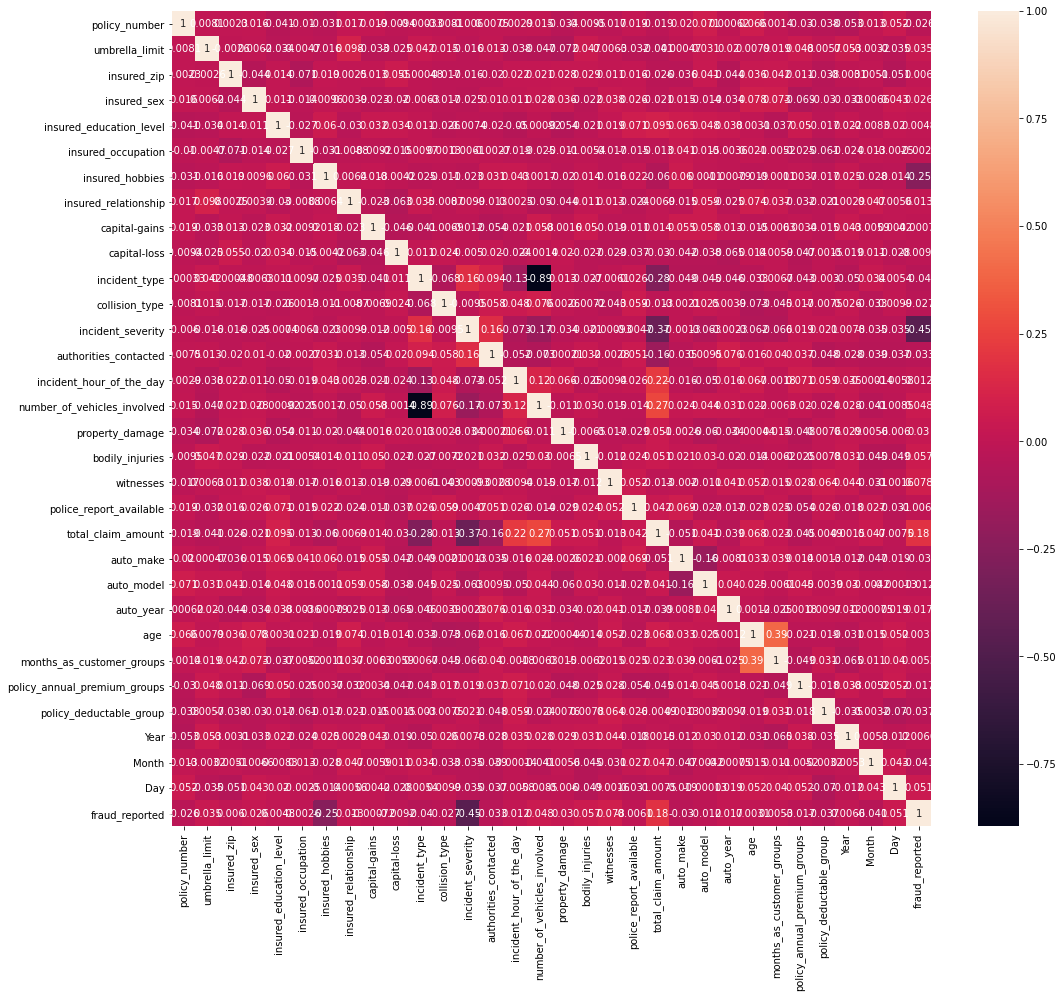

In [98]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [102]:
x_train.shape

(1054, 31)

In [103]:
x_test.shape

(452, 31)

In [104]:
y_train.shape

(1054,)

In [105]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[lr,gnb,svc,dtc,knc,adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 1 0 1]
actual value 1081    1
1293    1
238     0
1014    1
448  

Predicted result value: [1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1
 0 0 1 1 1 1 0 1]
actual value 1081    1
1293    1
238     0
1014    1
448  

From above logistic and classifiers below are the accuracy percentage: logistic 87.83% GaussianNB 87.83% SVC 88.27% DecisionTreeClassifier 85.61% KNeighborsClassifier 79.64%, AdaBoost 87.83% ,GradientBoost 88.71%

So, out of these top three models are GradientBoost, SVC, GaussianNB. we will test CV score to confirm the accuracy score.

Cross Validation

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
svc=SVC()
gnb=GaussianNB()
gdc=GradientBoostingClassifier()

model_cv=[svc,gnb,gdc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.7615894  0.85049834 0.89700997 0.94019934 0.910299  ]
0.8719192096983563
0.06228362541437216
[0.70529801 0.80398671 0.90365449 0.93355482 0.92358804]
0.854016413280236
0.08746501097929008
[0.77152318 0.83056478 0.90365449 0.9269103  0.91694352]
0.8699192537017888
0.059712458809481346


So, we will hypertune the above models and then see the best result.

Hypermeter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_gnb={}
param_gdc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
param_svc={'kernel':['linear','rbf','poly'],'C':[1,10]}

modelgnb=GaussianNB()
modelgdc=GradientBoostingClassifier()
modelsvc=SVC()

In [111]:
gridgdc=GridSearchCV(estimator=modelgdc,param_grid=param_gdc)
gridgdc.fit(x,y)
print(gridgdc)
print(gridgdc.best_score_)
print(gridgdc.best_estimator_)
print(gridgdc.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.8805262810499219
GradientBoostingClassifier(learning_rate=0.05)
{'learning_rate': 0.05}


In [112]:
gridsvc=GridSearchCV(estimator=modelsvc,param_grid=param_svc)
gridsvc.fit(x,y)
print(gridsvc)
print(gridsvc.best_score_)
print(gridsvc.best_estimator_)
print(gridsvc.best_params_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})
0.8858638973839958
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


In [113]:
gridgnb=GridSearchCV(estimator=modelgnb,param_grid=param_gnb)
gridgnb.fit(x,y)
print(gridgnb)
print(gridgnb.best_score_)
print(gridgnb.best_estimator_)
print(gridgnb.best_params_)

GridSearchCV(estimator=GaussianNB(), param_grid={})
0.854016413280236
GaussianNB()
{}


So, best result comes out in Support Vector Classifier with cv=10 and kernel =rbf, we will same the model by taking out result.

In [114]:
svc1=SVC(kernel='rbf')

model_cv=[svc1]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=10)
    print(score)
    print (score.mean())
    print (score.std())

[0.79470199 0.8410596  0.78807947 0.88741722 0.91390728 0.88741722
 0.92       0.95333333 0.94       0.9       ]
0.8825916114790286
0.05423268102144497


In [115]:
import pickle
filename='Fraud_Detection.pkl'
pickle.dump(svc1, open(filename,'wb'))